In [5]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics 


In [6]:
df = pd.read_csv("car_evaluation.csv")
print("Data exploration:")
df

Data exploration:


,buying_price,maintenance_price,num_doors,num_persons,luggage_boot,safety,acceptable,train
0,3,3,1,1,3,3,0,1
1,3,3,1,3,1,1,0,1
2,2,3,4,2,3,3,1,1
3,4,1,1,3,2,1,0,1
4,4,2,3,3,1,3,1,1
...,...,...,...,...,...,...,...,...
1723,4,2,3,2,1,2,1,1
1724,2,1,3,3,2,2,0,1
1725,2,2,1,1,2,2,0,1
1726,3,3,4,3,1,2,1,1


In [7]:
#Creating relevant dataframees: 
train_df = df[df["train"]==1]
test_df = df[df["train"]==0]
#removing "train" labal
train_df = train_df.drop(columns=["train"])
test_df = test_df.drop(columns=["train"])

print(f"The number of training instances is: {train_df.shape[0]}")
print(f"The number of testing instances is: {test_df.shape[0]}")

The number of training instances is: 1178
The number of testing instances is: 550


<b>Question 5:</b> We can see that there are 1728 data points, meaning we have 1729 "cars". We will train the algorithm over 1178 instances and the rest (550) will be used for testing. 

<b>Question 6:</b> each instance has 8 features, which are: buying_price, maintenance_price num_doors num_persons luggage_boot safety, acceptable. The last colum ("train") marks the set he instance belongs to, therfore it is not a feature. 

<b>Question 7:</b> The predicators are buying_price	maintenance_price num_doors	num_persons	luggage_boot safety.

<b>Question 8:</b> The label will be "acceptable", the very thing we are tring to predict. 


## Part 2

<b>Question 9:</b> Funcrions from the tutorial: 

In [8]:
def get_XY(ndarray):
    ndarray= ndarray.values
    X=ndarray[:,:-1]
    Y= ndarray[:,-1]
    return X,Y
#I've chaned the data format a bit so I chaned the func from the tutorial

def get_clf(X,Y):
    clf= DecisionTreeClassifier( criterion="gini",  min_impurity_decrease=0.01)
    clf.fit(X, Y)
    return(clf)

def get_pred(classifier, X):
    y_pred = classifier.predict(X)
    return(y_pred)

<b>Question 9 (continue) :</b> Splitting the data to label colum and features matrix, building an object, fitting the training data

In [9]:
X_train,Y_train = get_XY(train_df)
X_test,Y_test = get_XY(test_df)
clf=get_clf(X_train,Y_train)


<b>Question 10:</b> claculation the gini by the formula:

$$ Gini(Root) = 1 - \sum_{i\in 'acceptable' label} (\frac{|S_i|}{|S|})^2 $$

In [10]:
def calc_gini(data):
    """
    Input: any dataset where the last column holds the labels.
    Returns the gini impurity.    
    """
    gini = 1.0
    for attribute in [0,1]: #0, 1 are the possible labels in "accaptable" colum
        gini -= (data[data['acceptable']==attribute].shape[0]/data.shape[0])**2
    
    return gini

print(f"The gini of the root is {calc_gini(train_df)}")

train_df_safty_smaller_than_1_5 = train_df[train_df['safety']<=1.5]
train_df_safty_bigger_than_1_5 = train_df[train_df['safety']>1.5]

weight1 = train_df_safty_smaller_than_1_5.shape[0]/train_df.shape[0]
weight2 = train_df_safty_bigger_than_1_5.shape[0]/train_df.shape[0]

gini_after_split = weight1 * calc_gini(train_df_safty_smaller_than_1_5)
gini_after_split += weight2 * calc_gini(train_df_safty_bigger_than_1_5)

print(f"The gini after the split is {gini_after_split}")

The gini of the root is 0.4162907405432361
The gini after the split is 0.32415292026979703


Dear tutor, note that the gini index that takes into consideretion the "safty" feature is the the root childs, its calculated again after the split with the safty <= 1.5 condition. The algorithm chooses 'safty' as the first attribute because we get the <b> largest loss in uncertinty</b> under that one in the current data set.

<b>Question 11:</b> 

• Car with a low buying price, very high maintenance price, 3 doors, 2 persons can be carried, medium luggage boot and low in safety - 


low in saftey <= 1 means left node (True), we have reached a leaf of class -><b> Unaccepable </b>

• Car with a high or very high buying price, medium maintenance price, 4 doors, 4 or more persons can be carried, big luggage boot and medium or high in safety.
    
 False (medium or high is bigger than 1.5) -> False (4 persons or more) -> True (buying price==1) -> False (maintanence price == 3) ->  False (luggage_boot == 3) ->  <b>Acceptable</b>

• Car with a medium buying, low maintenance price, 2 doors, 2 persons can be carried, small luggage boot and medium or high in safety.
    
 False (medium or high) -> (num_of_persons == 1) True -> <b>Unacceptable
    
<b> Automated test to check my answers </b>:
    

In [11]:
question_11_df = pd.read_csv("question11.csv")
answers = get_pred(clf,question_11_df)
answer_dict={
    0: "Unaccepable",
    1: "Accepable"
}
print("The predictions:")
for i in range(3):
    print(f"Instance {i+1} is {answer_dict[answers[i]]} ")
print("\n Note the vectors:")
question_11_df

The predictions:
Instance 1 is Unaccepable 
Instance 2 is Accepable 
Instance 3 is Unaccepable 

 Note the vectors:


C:\Users\Yotga\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


,buying_price,maintenance_price,num_doors,num_persons,luggage_boot,safety
0,4,1,2,1,2,1
1,2,3,2,2,3,3
2,3,4,1,1,1,2


### Task 4:

<b>Question 12 + 13 + 14</b>:  making predictions for the test set, comparing the predictions to the true label of the test set: 

In [12]:
def get_accuracy(test,pred): 
    accuracy = metrics.accuracy_score(test, pred)
    return accuracy

y_pred = get_pred(clf, X_test)
clf_accuracy=get_accuracy(Y_test,y_pred) 

print(f"Accuracy is {clf_accuracy}")

Accuracy is 0.92


<b>note:</b> The accuracy is 0.92, meaning that 
$$ 0.98 = \frac{|TruePositive| +  |TrueNegative|}{|Test set|} $$

We are "right" for 0.92 precent of the total instances (predictions). We need to check that the model isn't biased towards Positive or Negative results with TNR and TPR metrics, which we can calculare from the confution matrix: 


 $$True Positive Rate = \frac{|True Positive Predictions|}{|All Positive Predictions|} $$

 $$True Negative Rate = \frac{|True Negative Predictions|}{|All Negative Predictions|} $$
 
 Note: in our case, because we are trying to predict the Acceptance of a car, if we won't mind offering alot of people cars, we will prefer the model to be biased towards Positive predictions (small FN, big FP)

In [13]:
X_test_false,Y_test_false = get_XY(test_df[test_df["acceptable"]==0])
Y_test_false_pred = get_pred(clf, X_test_false)
TNR_accuracy=get_accuracy(Y_test_false_pred,Y_test_false) 
print(f"TNR Accuracy is {TNR_accuracy}")

X_test_true,Y_test_true = get_XY(test_df[test_df["acceptable"]==1])
Y_test_true_pred = get_pred(clf, X_test_true)
TPR_accuracy=get_accuracy(Y_test_true_pred,Y_test_true) 
print(f"TPR Accuracy is {TPR_accuracy}")


TNR Accuracy is 0.9210526315789473
TPR Accuracy is 0.9176470588235294


In [14]:
print("Fun TASK!! ")

Fun TASK!! 


<b>(my own tests, not for grading): Making sure the tree is the same: </b> 

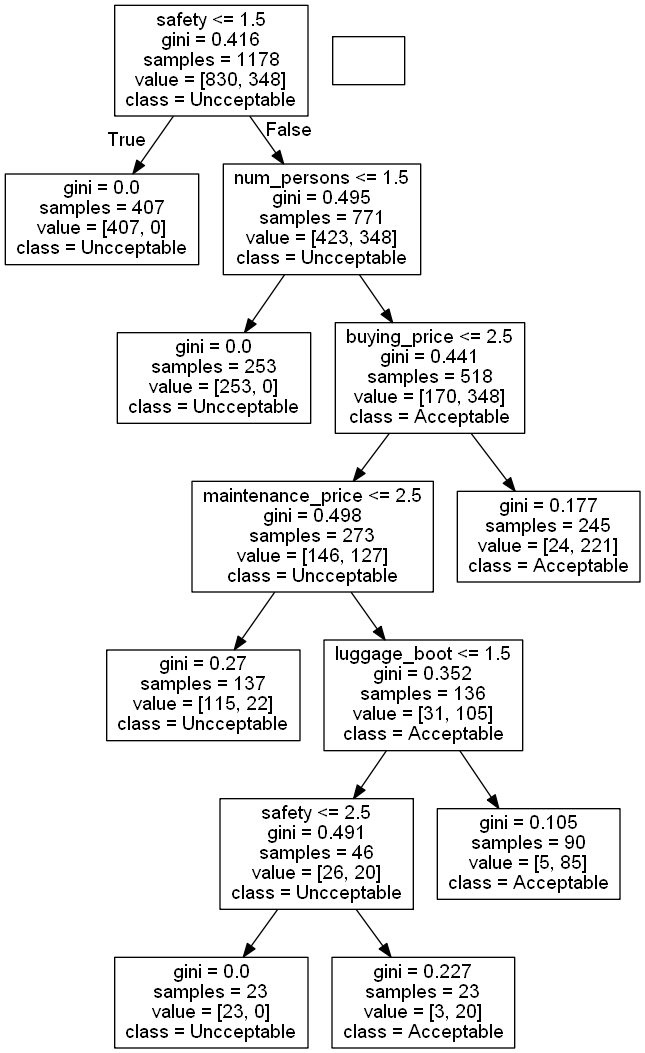

In [15]:
import pydotplus
import os
from IPython.display import Image

def get_predictors_names(dataframe):
    names = list(dataframe.columns)
    predictors_names=names[:-1]
    return predictors_names

df_predictors_names = get_predictors_names(train_df)
df_class_names=['Uncceptable','Acceptable']
def get_graph(clf,df_predictors_names):
    dot_data = tree.export_graphviz(clf, out_file=None, feature_names=df_predictors_names, class_names=df_class_names)
    graph = pydotplus.graph_from_dot_data(dot_data) 
    return graph

graph =get_graph(clf,df_predictors_names)
def save_graph(grpah):
    graph.write_pdf("DT flights.pdf")
    graph.write_jpg("DT flights.jpg")
save_graph(graph)

def get_image(graph):
    image = Image(graph.create_png())
    return image
image = get_image(graph)
image